In [17]:
import pandas as pd
path_in="/home/noura369/Documents/Basic_NOURA2/ABC/titanic-passengers.csv"
df =pd.read_csv(path_in,sep=';')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [19]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

In [28]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

In [30]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [31]:
#applying tree algorithm
tre = tree.DecisionTreeClassifier()  
tre.fit(x_train, y_train)   #fitting our model
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7541899441340782


In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


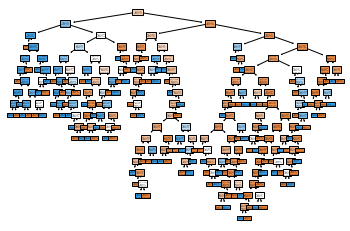

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tre = tree.DecisionTreeClassifier()  

tre.fit(x_train, y_train)   #fitting our model
y_pred=tre.predict(x_test)   # evaluating our model

plt.figure()
plot_tree(tre, filled=True);

In [36]:
'''import graphviz
dot_data= tree.export_graphviz(tre, out_file= None)
graph =graphviz.Source(dot_data)
graph.render("data")
graph'''

'import graphviz\ndot_data= tree.export_graphviz(tre, out_file= None)\ngraph =graphviz.Source(dot_data)\ngraph.render("data")\ngraph'

In [56]:
#Decision Tree Pruning Code
tre =tree.DecisionTreeClassifier( criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)

In [39]:
#applying tree algorithm
tre = tree.DecisionTreeClassifier()  
tre.fit(x_train, y_train)   #fitting our model
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7873134328358209


In [52]:
#Another parameter change in max_depth:
from sklearn import metrics  # Importing metrics to test accuracy
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
#Accuracy: 0.7910447761194029 is higher than decisionTree accuracy score

Accuracy: 0.7910447761194029


In [53]:
#Another parameter change in random state:
from sklearn import metrics  # Importing metrics to test accuracy

clf=DecisionTreeClassifier(random_state=5)
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
##Accuracy:  0.7686567164179104 is higher than decisionTree accuracy score

Accuracy: 0.7686567164179104


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

#extract x and y from our data
x = df[['Pclass', 'Sex','Age','Fare','SibSp','Parch']]
y = df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#splitting data with test size of 30%

In [24]:
#Random Forest Prediction
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
#Accuracy is high with estemator=10

Accuracy: 0.8097014925373134


In [25]:
#Random Forest Prediction
clf=RandomForestClassifier(n_estimators=35)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8022388059701493


In [26]:
#Random Forest Prediction
clf=RandomForestClassifier(n_estimators=2)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.7761194029850746


In [27]:
#Random Forest Prediction
clf=RandomForestClassifier(n_estimators=1)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.75


In [29]:
#Random Forest Prediction
clf=RandomForestClassifier(n_estimators=150)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
#Accuracy is high with estemator=150

Accuracy: 0.8097014925373134
